In [4]:
#Importing Libraries and DataSet

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,r2_score
df=pd.read_csv(r'kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [24]:
#Cleaning the DataSet

In [25]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [26]:
df.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [27]:
df.fillna(df.mean(),inplace=True)


In [28]:
df.dropna(axis=0,inplace=True)
df.isnull().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

            id       age        bp        sg        al        su       bgr  \
id    1.000000 -0.218197 -0.352306  0.684678 -0.744421 -0.341164 -0.450923   
age  -0.218197  1.000000  0.074579 -0.269148  0.241351  0.169456  0.244649   
bp   -0.352306  0.074579  1.000000 -0.251396  0.347356  0.179991  0.181508   
sg    0.684678 -0.269148 -0.251396  1.000000 -0.690629 -0.385634 -0.482340   
al   -0.744421  0.241351  0.347356 -0.690629  1.000000  0.473926  0.478400   
su   -0.341164  0.169456  0.179991 -0.385634  0.473926  1.000000  0.708444   
bgr  -0.450923  0.244649  0.181508 -0.482340  0.478400  0.708444  1.000000   
bu   -0.466406  0.197221  0.280779 -0.450609  0.640310  0.251319  0.277641   
sc   -0.468011  0.177755  0.344515 -0.459714  0.647794  0.291381  0.288449   
sod   0.513422 -0.087303 -0.248715  0.477016 -0.582189 -0.216717 -0.263834   
pot  -0.114473  0.003636  0.117300 -0.058945  0.186017  0.237843  0.095830   
hemo  0.691463 -0.218986 -0.310018  0.649159 -0.780886 -0.341705

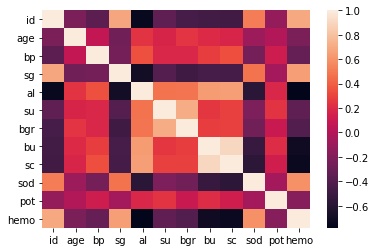

In [29]:
df.shape
cor_df=df.corr()
print(cor_df)
sns.heatmap(cor_df)

In [30]:
#Feature Selection
#We can see that the correlation values of Age,Id,BP, has the least signficance. So I proceed further leaving them out.

In [31]:
X=df.iloc[:,3:25].values
y=df.iloc[:,25:26].values


In [32]:
#LabelEncoder for Categorical Variables
#No need for OneHotCoding , because all the categorical varibles have only two variations

In [33]:
lb=LabelEncoder()
for i in range(3,7):
    X[:,i]=lb.fit_transform(X[:,i])
for i in range(16,22):
    X[:,i]=lb.fit_transform(X[:,i])

y[:,0]=lb.fit_transform(y[:,0])

In [34]:
#Splitting the DataSet into Training and Testing parts

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)


In [36]:
#Scaling the data

In [37]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
y_train=y_train.astype('int')


In [38]:
#Model Evaluation
#I want to check the accuracy of 3 different models and then fix on to a model with the best accuracy

In [65]:
def check_accuracy(X_train,X_test,y_train,y_test,model):
    model.fit(X_train,y_train.ravel())
    y_pred=model.predict(X_test)
    y_pred=y_pred.reshape(-1,1)
    return r2_score(y_test,y_pred)    

In [66]:
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
clf=svm.SVC()
l_models=[knn,dt,clf]
for i in l_models:
    acc_score=check_accuracy(X_train,X_test,y_train,y_test,i)
    print("The accuracy score of",str(i),"model is ",acc_score)
    
    

The accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') model is  0.9353146853146853
The accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') model is  0.8706293706293706
The accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) model is  1.

In [50]:
#Flask App

In [51]:
from joblib import dump
import pickle

In [52]:
dump(sc,"DT.save")
pickle.dump(dt,open('DT.pkl','wb'))